<a href="https://colab.research.google.com/github/RajaAbitha/RajaAbitha/blob/main/casestudy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the Dataset

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Looad the dataset
df=pd.read_csv('/content/train_loan.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Checking Missing values

In [5]:
# Missing value handlin
df.isnull().sum()
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
# Separate categorical and numerical column

categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns


In [7]:
categorical_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
numerical_columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [9]:
# Fill categorical column with mode
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Fill numerical column with mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())


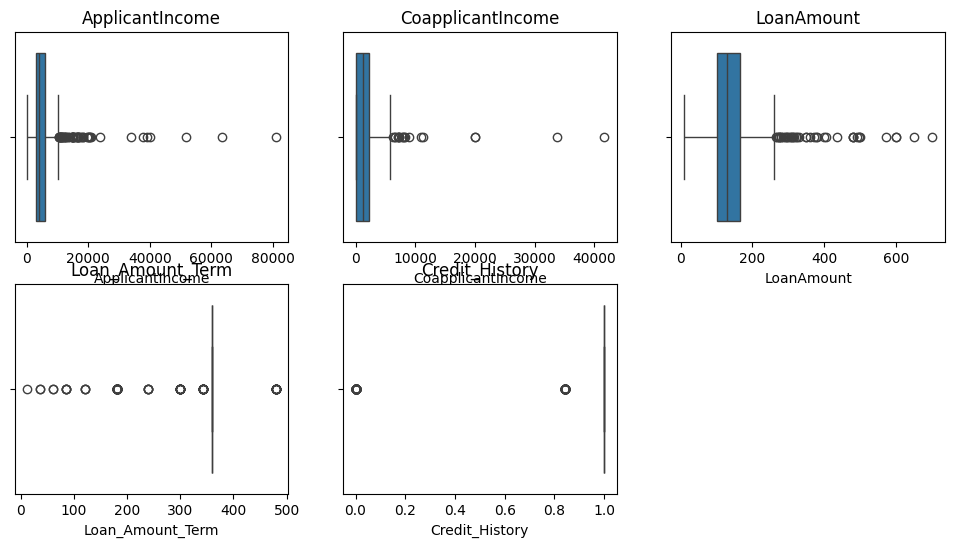

In [10]:
# Outlier Detection
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)


In [11]:

# Detect outliers in ApplicantIncome
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


df['ApplicantIncome'] = np.where(df['ApplicantIncome'] > upper, upper, df['ApplicantIncome'])


In [12]:
# Detect outliers in loan amount
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['LoanAmount'] = np.where(df['LoanAmount'] > upper, upper, df['LoanAmount'])


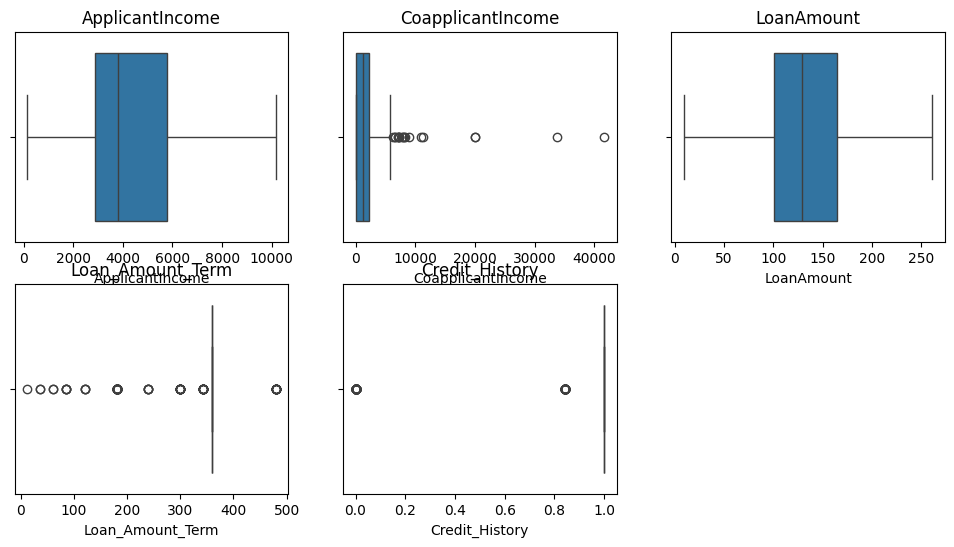

In [13]:
# Outlier Detection
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)


In [14]:
# Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])

df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

df['Dependents'].replace('3+', 3, inplace=True)
df['Dependents'] = df['Dependents'].astype(int)

/tmp/ipython-input-14-4094917950.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].replace('3+', 3, inplace=True)


In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,0,5849.0,0.0,146.412162,360.0,1.0,Y,False,True
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,N,False,False
2,LP001005,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1.0,Y,False,True
3,LP001006,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1.0,Y,False,True
4,LP001008,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1.0,Y,False,True


In [15]:
# onehot encoding for property area
df = pd.get_dummies(df, columns=['Property_Area'],drop_first=True)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# select numerical column to scale
df['LoanAmount']=sc.fit_transform(df[['LoanAmount']])
df['Loan_Amount_Term']=sc.fit_transform(df[['Loan_Amount_Term']])
df['ApplicantIncome']=sc.fit_transform(df[['ApplicantIncome']])
df['CoapplicantIncome']=sc.fit_transform(df[['CoapplicantIncome']])

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Gender                   614 non-null    int64  
 2   Married                  614 non-null    int64  
 3   Dependents               614 non-null    int64  
 4   Education                614 non-null    int64  
 5   Self_Employed            614 non-null    int64  
 6   ApplicantIncome          614 non-null    float64
 7   CoapplicantIncome        614 non-null    float64
 8   LoanAmount               614 non-null    float64
 9   Loan_Amount_Term         614 non-null    float64
 10  Credit_History           614 non-null    float64
 11  Loan_Status              614 non-null    object 
 12  Property_Area_Semiurban  614 non-null    bool   
 13  Property_Area_Urban      614 non-null    bool   
dtypes: bool(2), float64(5), in

In [17]:
print(df.isnull().sum())

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64


In [18]:
print(df.head())

    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0  146.412162             360.0   
1           4583.0             1508.0  128.000000             360.0   
2           3000.0                0.0   66.000000             360.0   
3           2583.0             2358.0  120.000000             360.0   
4           6000.0                0.0  141.000000             360.0   

   Credit_History Loan_Status  Property_Area_Semiurban  Property_Area_Urban  
0             1.0           Y                    False                 Tru